In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
import warnings

# suppress all warnings
warnings.filterwarnings("ignore")

In [4]:
train = pd.read_csv("data/bicikelj_train.csv")
train["timestamp"] = pd.to_datetime(train["timestamp"])

test = pd.read_csv("data/bicikelj_test.csv")
test["timestamp"] = pd.to_datetime(test["timestamp"])

In [5]:
def datetime64_to_unix(timestamp):
    """
    Convert a pandas DataFrame column of numpy.datetime64 objects to Unix timestamps in float format.
    
    Parameters:
        timestamp (pandas.Series): The column of timestamps to convert.
    
    Returns:
        pandas.Series: A new column of Unix timestamps.
    """
    unix_epoch = np.datetime64('1970-01-01T00:00:00Z')
    
    # Calculate the difference in seconds between the timestamp and Unix epoch
    seconds = (timestamp - unix_epoch) / np.timedelta64(1, 's')
    
    return pd.Series(seconds)


def unix_to_datetime64(unix_timestamp):
    """
    Convert a pandas DataFrame column of Unix timestamps in float format to numpy.datetime64 objects.
    
    Parameters:
        unix_timestamp (pandas.Series): The column of Unix timestamps to convert.
    
    Returns:
        pandas.Series: A new column of numpy.datetime64 objects.
    """
    unix_epoch = np.datetime64('1970-01-01T00:00:00Z')
    
    # Calculate the timedelta from the Unix timestamp in seconds
    timedelta = pd.to_timedelta(unix_timestamp, unit='s')
    
    # Add the timedelta to the Unix epoch to get the resulting datetime64 objects
    timestamp = unix_epoch + timedelta
    
    return pd.Series(timestamp)


In [6]:
def plot_bikes(train_df: pd.DataFrame, n_stations = 5, stations: list = None, random_state=42, howmany=100):
    times = train_df["timestamp"]
    stations_to_plot = None
        
    if stations is not None:
        stations_to_plot = train_df.loc(stations)
    elif n_stations is not None:
        stations_to_plot = train_df.drop("timestamp", axis=1).sample(n_stations, random_state=random_state, axis=1)
        
    fig, ax = plt.subplots(figsize=(20, 10))    
    
    print(stations_to_plot.shape)
    for station in stations_to_plot:
        ax.plot(times[:howmany], stations_to_plot[station].values[:howmany], label=station)
        
    ax.set_xlabel('Days')
    ax.set_ylabel('Number of bikes')
    ax.set_title('Time Series Data')
    ax.legend()
    

In [9]:
from sklearn.model_selection import train_test_split


X = datetime64_to_unix(train["timestamp"].values)
y = train.iloc[:, 1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train = np.array(X_train).reshape((-1, 1))
X_test = np.array(X_test).reshape((-1, 1))
y_train = np.array(y_train)
y_test = np.array(y_test)

y_test


array([14, 14, 13, ..., 19, 19, 20], dtype=int64)

-0.0433552978235372


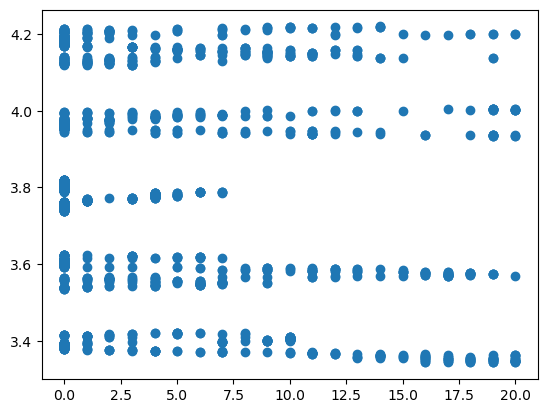

In [16]:
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso


def linear_regression(X_train, X_test, y_train, y_test):
        # Fit model
    lr = LinearRegression()
    # lr = Lasso(alpha=1)
    lr.fit(X_train, y_train)

    coefs = lr.coef_

    # for i in range(len(lr.coef_)):
    #     if lr.coef_[i] == 0:
    #         print(f"Removed {X.columns[i]}")
    #     else:
    #         print(f"{unix_to_datetime64(X[i])}: {lr.coef_[i]}")
    
    # Predict and score
    y_pred = lr.predict(X_test)
    
    plt.scatter(y_test, y_pred)
    
    score = r2_score(y_test, y_pred)
    return lr, score
    
lr, score = linear_regression(X_train, X_test, y_train, y_test)
print(score)